In [1]:
from getpass import getpass
from langchain_openai import ChatOpenAI

#OPENAI_API_KEY = getpass()

import os

#os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

#OPENAI_API_SECRET = getpass()
#os.environ['OPENAI_API_SECRET'] = OPENAI_API_SECRET
os.environ['api_key'] =  "sk-orbrjhjcqmgezlurbvsmfxqmnjwkmjdrypwdiwvyfarkbnag"
os.environ['base_url'] = "https://api.siliconflow.cn/v1"

os.environ["OPENAI_API_BASE"] = "http://192.168.100.111:9997/v1/"
os.environ["OPENAI_API_KEY"] = "xxx"
os.environ["TAVILY_API_KEY"] = "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"  # 官网注册获取key


In [2]:
llm = ChatOpenAI(model="qwen2", max_tokens=100, max_retries=2)

In [3]:
from openai import OpenAI
from langchain_core.prompts import PromptTemplate
# from langchain_openai import OpenAI


client = OpenAI(api_key="sk-orbrjhjcqmgezlurbvsmfxqmnjwkmjdrypwdiwvyfarkbnag", base_url="https://api.siliconflow.cn/v1")

response = client.chat.completions.create(
    model='THUDM/glm-4-9b-chat',
    messages=[{
        'role': 'user',
        'content': "随机用csv格式输出一个表格"
    }],
    stream=False
)
response

ChatCompletion(id='019092777d73ef8c78b731694452ca55', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='\n当然可以。以下是一个简单的CSV格式的示例表格数据：\n\n```csv\nID,Name,Age,Salary\n1,John Doe,30,60000\n2,Jane Smith,28,50000\n3,Bill Johnson,45,70000\n4,Jessica Wang,25,48000\n5,Michael Brown,38,62000\n```\n\n这个表格包含了五个人员的基本信息，包括ID、姓名、年龄和薪水。每行代表一个人员的记录，字段之间用逗号分隔。在实际的使用中，你可以根据需求增加或者减少列，并填充相应的数据。', role='assistant', function_call=None, tool_calls=None))], created=1720444222, model='THUDM/glm-4-9b-chat', object='chat.completion', service_tier=None, system_fingerprint='', usage=CompletionUsage(completion_tokens=128, prompt_tokens=12, total_tokens=140))

In [4]:
response.choices[0].message.content

'\n以下是一个简单的CSV格式的文本表格，包含了四列和五行数据。您可以将此文本复制并粘贴到文本编辑器中，将其保存为扩展名为`.csv`的文件，然后使用电子表格程序（如Microsoft Excel或LibreOffice Calc）或任何支持CSV格式的软件来查看它。\n\n```csv\n标题,名称,数量,价格\nRecord 1,产品A,5,9.99\nRecord 2,产品B,2,19.99\nRecord 3,产品C,1,4.99\nRecord 4,产品D,3,14.99\nRecord 5,产品E,4,7.99\n```'

In [5]:
# set the LANGCHAIN_API_KEY environment variable (create key in settings)
from langchain import hub
prompt = hub.pull("rlm/rag-prompt")

In [6]:
runnable = prompt | llm

In [7]:
from langchain_core.prompts import PromptTemplate

template = """Question: {question}

Answer: Let's think step by step."""

prompt = PromptTemplate.from_template(template)

In [8]:
llm_chain = prompt | llm

question = "今天是什么日子？"

llm_chain.invoke(question)

AIMessage(content='作为一个AI，我无法实时提供日期，因为我没有实时更新的能力。但是，如果你是在询问某个具体的日子的意义，比如节日、纪念日等，我可以提供一些常见日期的信息。例如，如果你问“今天是情人节吗？”我可以告诉你情人节是每年的2月14日。如果你需要具体日期，请参考你设备上的日历。', response_metadata={'token_usage': {'completion_tokens': 74, 'prompt_tokens': 35, 'total_tokens': 109}, 'model_name': 'qwen2', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-a611810c-2228-4dc6-934e-3b7f165efd12-0', usage_metadata={'input_tokens': 35, 'output_tokens': 74, 'total_tokens': 109})

In [7]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages

class State(TypedDict):
    # 消息用列表的格式和‘add_messages'函数保存
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)    

In [ ]:
from langchain_openai import ChatOpenAI

In [5]:
llm = client

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [6]:
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")

In [7]:
graph = graph_builder.compile()

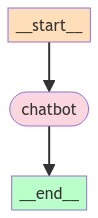

In [8]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [9]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

AttributeError: 'OpenAI' object has no attribute 'invoke'